In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [3]:
print(np.__version__)

2.3.4


### 1. Prepare paths and localisation

Ensure the project root is the working directory so that relative paths
and imports from the `src` package behave consistently with .py scripts.

In [10]:
if os.getcwd().endswith('notebooks'):
    os.chdir('..')
    print(f"Zmieniono katalog roboczy na: {os.getcwd()}")

if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

Zmieniono katalog roboczy na: d:\$projects\python\master_thesis


In [5]:
def get_page_distribution(number_of_pages):
    """
    Oblicza znormalizowany rozkład wykładniczy dla stron: p(x) = e^-x.
    """
    # Obliczanie e^-x dla x w [1, N]
    weights = np.exp(-np.arange(1, number_of_pages + 1))
    
    # Normalizacja (suma wag = 1.0)
    return weights / weights.sum()

# Konfiguracja estetyki wykresów
plt.style.use('seaborn-v0_8-muted') # Lub inny dostępny styl

### 2. Run main step

In [6]:
# Scenariusze do porównania
n_short = 10
n_long = 25

dist_short = get_page_distribution(n_short)
dist_long = get_page_distribution(n_long)

# Przygotowanie DataFrame do łatwego podglądu (opcjonalnie w notebooku)
df_short = pd.DataFrame({
    'Page': np.arange(1, n_short + 1),
    'Probability': dist_short
}).set_index('Page')

display(df_short.head())

,Probability
Page,
1,0.632149
2,0.232555
3,0.085552
4,0.031473
5,0.011578


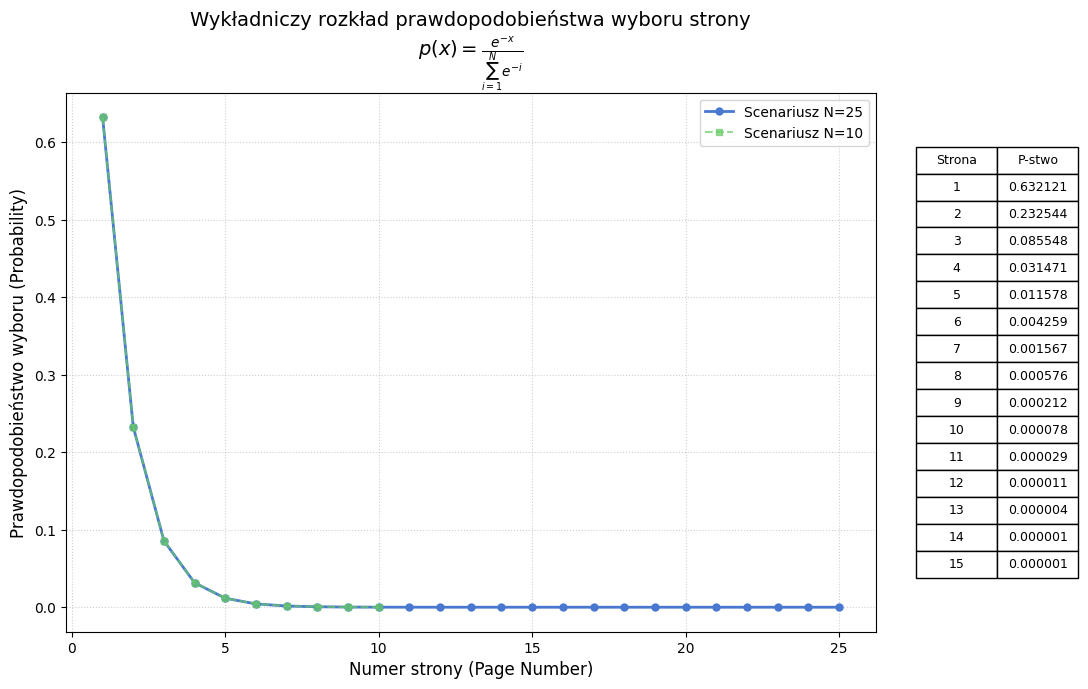

In [ ]:
# Tworzenie figury
fig, ax = plt.subplots(figsize=(12, 7))

# 1. Rysowanie linii rozkładu
ax.plot(np.arange(1, n_long + 1), dist_long, 'o-', label=f'Scenariusz N={n_long}', markersize=5, linewidth=2)
ax.plot(np.arange(1, n_short + 1), dist_short, 's--', label=f'Scenariusz N={n_short}', markersize=5, alpha=0.7)

# 2. Formatowanie osi i tytułów
ax.set_xlabel('Numer strony (Page Number)', fontsize=12)
ax.set_ylabel('Prawdopodobieństwo wyboru (Probability)', fontsize=12)
ax.set_title('Wykładniczy rozkład prawdopodobieństwa wyboru strony\n$p(x) = \\frac{e^{-x}}{\\sum_{i=1}^{N} e^{-i}}$', fontsize=14, pad=20)
ax.grid(True, linestyle=':', alpha=0.6)
ax.legend(loc='upper right')

# 3. Dodanie tabeli z danymi (z boku wykresu)
# Formatuje dane do 6 miejsc po przecinku (czytelność vs precyzja)
table_vals = [[f"{i+1}", f"{val:.6f}"] for i, val in enumerate(dist_long)]

# Tworzymy tabelę po prawej stronie (bbox: [left, bottom, width, height])
the_table = ax.table(
    cellText=table_vals[:15], # Pokazujemy pierwsze 15 stron, by nie przeładować wykresu
    colLabels=['Strona', 'P-stwo'],
    cellLoc='center',
    loc='right',
    bbox=[1.05, 0.1, 0.2, 0.8]
)
the_table.auto_set_font_size(False)
the_table.set_fontsize(9)

# Dostosowanie marginesów, by tabela się zmieściła
plt.subplots_adjust(right=0.8)

# Zapis do pliku wysokiej jakości
plt.savefig('reports/plots/exponential_distribution.png', dpi=300, bbox_inches='tight')
plt.show()